## Modeling

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

%store -r df1

In [6]:
df1.describe()

,distance_seattle,property_age,rooms_per_floor,sqft_lot,sqft_living,price,renovation_1,renovation_unknown,waterfront_1,waterfront_unknown
count,14328.000000,14328.000000,14328.000000,1.432800e+04,14328.000000,14328.000000,14328.000000,14328.000000,14328.000000,14328.000000
mean,10.637792,47.677136,3.708012,1.070549e+04,1685.060441,430268.904453,0.028197,0.179299,0.002443,0.110483
std,5.885533,29.764941,1.133331,2.541274e+04,527.717693,163521.948393,0.165540,0.383616,0.049366,0.313502
min,0.330000,-1.000000,0.750000,5.200000e+02,370.000000,78000.000000,0.000000,0.000000,0.000000,0.000000
25%,5.490000,23.000000,2.750000,4.534000e+03,1280.000000,300000.000000,0.000000,0.000000,0.000000,0.000000
50%,9.850000,47.000000,3.380000,7.110000e+03,1650.000000,409900.000000,0.000000,0.000000,0.000000,0.000000
75%,15.220000,67.000000,4.750000,9.450000e+03,2080.000000,540625.000000,0.000000,0.000000,0.000000,0.000000
max,22.810000,115.000000,6.000000,1.164794e+06,2830.000000,873000.000000,1.000000,1.000000,1.000000,1.000000


### Check vif for multicollinearity

In [7]:
x_variables = ['sqft_living', 'waterfront_1', 'distance_seattle', 'property_age', 
               'renovation_1', 'rooms_per_floor', 'sqft_lot']
X = df1[x_variables]

In [8]:
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
          index=X.columns)

sqft_living          8.188414
waterfront_1         1.009818
distance_seattle     5.074414
property_age         3.928248
renovation_1         1.070720
rooms_per_floor     12.387571
sqft_lot             1.246398
dtype: float64

In [144]:
outcome = 'price'
x_variables = ['sqft_living', 'waterfront_1', 'distance_seattle','property_age']

In [145]:
predictors = '+'.join(x_variables)
formula = outcome + '~' + predictors + '-1'
model = ols(formula=formula, data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          4.242e+04
Date:                Mon, 05 Oct 2020   Prob (F-statistic):                        0.00
Time:                        19:14:39   Log-Likelihood:                     -1.8887e+05
No. Observations:               14328   AIC:                                  3.778e+05
Df Residuals:                   14324   BIC:                                  3.778e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
sqft_living        269.8897      1.448    186.405      0.000     267.052     272.728
waterfront_1      1.699e+05   2.18e+04      7.804      0.000    1.27e+05    2.13e+05
distance_seattle -9744.0303    177.544    -54.882      0.000   -1.01e+04   -9396.021
property_age      1408.9863     29.513     47.741      0.000    1351.137    1466.836
==============================================================================
Omnibus:                       44.968   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.358
Skew:                          -0.049   Prob(JB):                     5.78e-13
Kurtosis:                       3.291   Cond. No.                     3.58e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* *R-squared* and *Adj. R-squared* take on the same value which by itself means 92% of observations can be explain by our model.
* Our p-vaues are all 0, which means our parameters are significant.

### Homoscedasticity

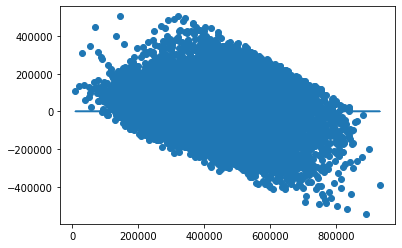

In [146]:
plt.scatter(model.predict(df1[x_variables]), model.resid)
plt.plot(model.predict(df1[x_variables]), [0 for i in range(len(df1))])

### Plotting our model

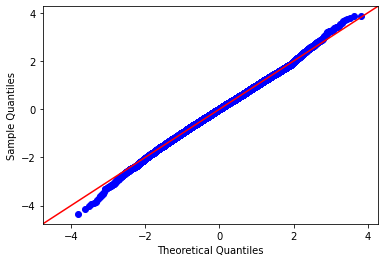

In [147]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [148]:
## Train Test

In [149]:
y = df1[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

11462 2866 11462 2866


In [152]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_hat_train = lin_reg.predict(X_train)
y_hat_test = lin_reg.predict(X_test)

### Residuals and MSE

In [154]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [156]:
from sklearn.metrics import mean_squared_error, make_scorer

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 13344180055.466454
Test Mean Squarred Error: 13321004033.78375


### CrossValidating our Model

In [157]:
from sklearn.model_selection import cross_val_score

In [159]:
mse = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(lin_reg, X, y, cv=5, scoring=mse)

In [160]:
cv_5_results.mean()

13372114384.12827